In [3]:
import pandas as pd

# Load the sales data
sales_data = pd.read_csv('sales_data.csv')

# Display the first few rows of the dataframe
sales_data.head()

,Date,Time,StoreID,CustomerID,OrderID,Product Name,Size,Crust
0,2024-12-05,02:56:32,0,0,0,BBQ Chicken,medium,thick
1,2024-12-05,02:56:32,0,0,0,Margherita,medium,thin
2,2024-12-05,02:56:32,0,0,1,Margherita,medium,thin
3,2024-12-05,02:56:32,0,0,1,Hawaiian,large,stuffed crust
4,2024-12-05,02:56:32,0,0,1,Supreme,large,thin


In [12]:
# Count the occurrences of each product
product_counts = sales_data['Product Name'].value_counts()

# Display the most prevalent products
print(product_counts.head())

Product Name
Veggie         1176
Pepperoni      1143
Margherita     1136
Meat Lovers    1124
Hawaiian       1117
Name: count, dtype: int64


In [5]:
# Define a large basket as having more than a certain number of items
large_basket_threshold = 5

# Group by CustomerID and count the number of items in each basket
basket_sizes = sales_data.groupby('CustomerID').size()

# Count the number of large baskets
large_basket_counts = basket_sizes[basket_sizes > large_basket_threshold].count()

# Display the frequency of large buyers
print(large_basket_counts)

10


In [6]:
# Group by StoreID and count the number of large baskets in each store
large_basket_stores = sales_data[sales_data['CustomerID'].isin(basket_sizes[basket_sizes > large_basket_threshold].index)]
store_large_basket_counts = large_basket_stores['StoreID'].value_counts()

# Display the stores with large-basket buyers
print(store_large_basket_counts)

StoreID
7     107
52    107
93    105
61    105
77    104
     ... 
44     75
65     75
8      75
76     74
20     70
Name: count, Length: 100, dtype: int64


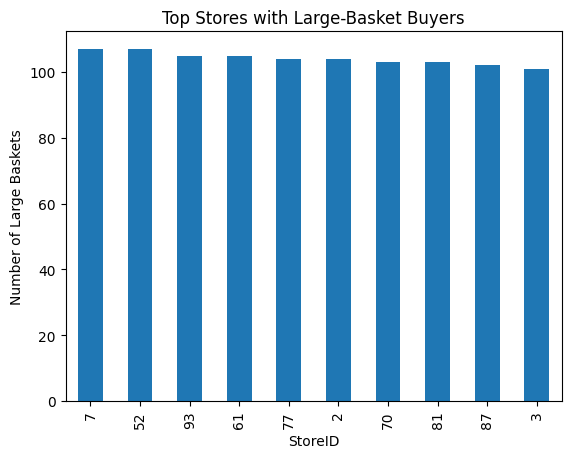

In [7]:
import matplotlib.pyplot as plt

# Plot the top stores with large-basket buyers
store_large_basket_counts.head(10).plot(kind='bar')
plt.title('Top Stores with Large-Basket Buyers')
plt.xlabel('StoreID')
plt.ylabel('Number of Large Baskets')
plt.show()

In [8]:
# Get the products in large baskets
large_basket_products = large_basket_stores['Product Name'].value_counts()

# Display the top-N products
top_n = 10
print(large_basket_products.head(top_n))

Product Name
Veggie         1176
Pepperoni      1143
Margherita     1136
Meat Lovers    1124
Hawaiian       1117
BBQ Chicken    1107
Supreme        1097
Cheese         1097
Name: count, dtype: int64


In [9]:
# Group by CustomerID and get the average basket makeup
basket_makeup = sales_data.groupby('CustomerID')['Product Name'].apply(lambda x: x.value_counts(normalize=True))

# Display the average categorical makeup of baskets
print(basket_makeup.head())

CustomerID             
0           Pepperoni      0.148649
            Veggie         0.137387
            Cheese         0.131757
            Hawaiian       0.130631
            Meat Lovers    0.120495
Name: Product Name, dtype: float64


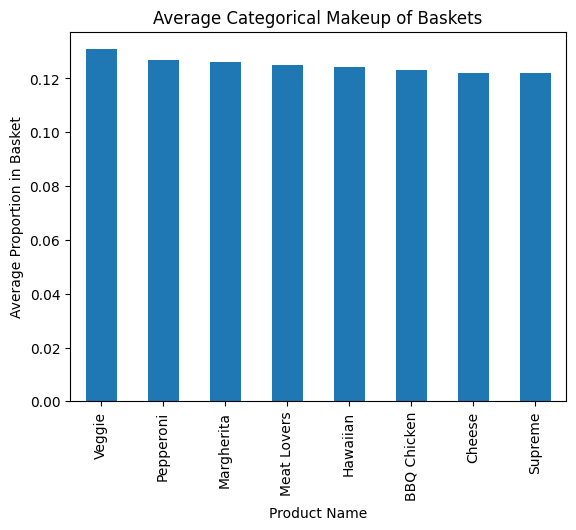

In [10]:
# Plot the categorical makeup of baskets
basket_makeup_df = basket_makeup.unstack().mean().sort_values(ascending=False)
basket_makeup_df.plot(kind='bar')
plt.title('Average Categorical Makeup of Baskets')
plt.xlabel('Product Name')
plt.ylabel('Average Proportion in Basket')
plt.show()

# **PROJECT #3 Below here**

1. Analysis of Product Occurrences


In [11]:
# Count the occurrences of each product (PROJECT 3)
product_counts = sales_data['Product Name'].value_counts()

# Display the most prevalent products
print("Most Prevalent Products:")
print(product_counts.head())

Most Prevalent Products:
Product Name
Veggie         1176
Pepperoni      1143
Margherita     1136
Meat Lovers    1124
Hawaiian       1117
Name: count, dtype: int64


2. Analysis of Large Baskets

In [13]:
# Define a large basket as having more than a certain number of items (PROJECT 3)
large_basket_threshold = 5

# Group by CustomerID and count the number of items in each basket
basket_sizes = sales_data.groupby('CustomerID').size()

# Count the number of large baskets
large_basket_counts = basket_sizes[basket_sizes > large_basket_threshold].count()

# Display the frequency of large buyers
print("Number of Large Baskets:")
print(large_basket_counts)

Number of Large Baskets:
10


3. Store Analysis: Identify stores with the highest number of large-basket buyers.

In [14]:
# Group by StoreID and count the number of large baskets in each store (PROJECT 3)
large_basket_stores = sales_data[sales_data['CustomerID'].isin(basket_sizes[basket_sizes > large_basket_threshold].index)]
store_large_basket_counts = large_basket_stores['StoreID'].value_counts()

# Display the stores with large-basket buyers
print("Stores with Large-Basket Buyers:")
print(store_large_basket_counts)

Stores with Large-Basket Buyers:
StoreID
7     107
52    107
93    105
61    105
77    104
     ... 
44     75
65     75
8      75
76     74
20     70
Name: count, Length: 100, dtype: int64


4. Plot Top Stores with Large-Basket Buyers: Visualize the top stores with large-basket buyers.

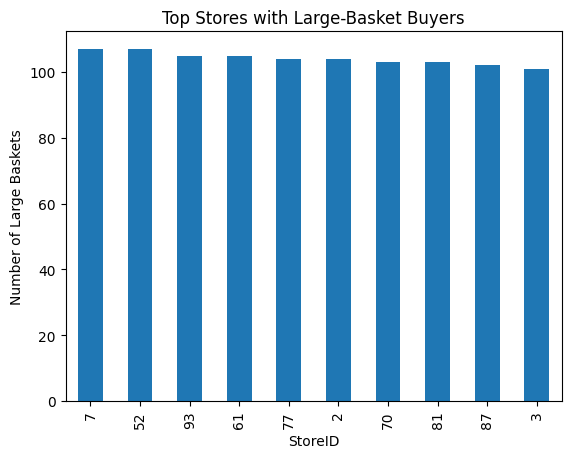

In [15]:
import matplotlib.pyplot as plt

# Plot the top stores with large-basket buyers (PROJECT 3)
store_large_basket_counts.head(10).plot(kind='bar')
plt.title('Top Stores with Large-Basket Buyers')
plt.xlabel('StoreID')
plt.ylabel('Number of Large Baskets')
plt.show()

5. Analysis of Products in Large Baskets

In [16]:
# Get the products in large baskets (PROJECT 3)
large_basket_products = large_basket_stores['Product Name'].value_counts()

# Display the top-N products
top_n = 10
print("Top Products in Large Baskets:")
print(large_basket_products.head(top_n))

Top Products in Large Baskets:
Product Name
Veggie         1176
Pepperoni      1143
Margherita     1136
Meat Lovers    1124
Hawaiian       1117
BBQ Chicken    1107
Supreme        1097
Cheese         1097
Name: count, dtype: int64


6. Analysis of Basket Makeup

In [17]:
# Group by CustomerID and get the average basket makeup
basket_makeup = sales_data.groupby('CustomerID')['Product Name'].apply(lambda x: x.value_counts(normalize=True))

# Display the average categorical makeup of baskets
print("Average Categorical Makeup of Baskets:")
print(basket_makeup.head())

Average Categorical Makeup of Baskets:
CustomerID             
0           Pepperoni      0.148649
            Veggie         0.137387
            Cheese         0.131757
            Hawaiian       0.130631
            Meat Lovers    0.120495
Name: Product Name, dtype: float64


7. Plot Basket Makeup: Visualize the average categorical makeup of baskets.

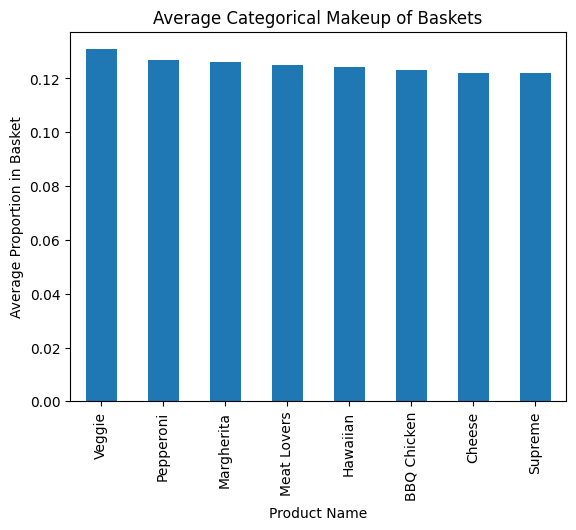

In [18]:
# Plot the categorical makeup of baskets
basket_makeup_df = basket_makeup.unstack().mean().sort_values(ascending=False)
basket_makeup_df.plot(kind='bar')
plt.title('Average Categorical Makeup of Baskets')
plt.xlabel('Product Name')
plt.ylabel('Average Proportion in Basket')
plt.show()

8. Market Basket Analysis

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create a basket for each store
basket = (sales_data.groupby(['StoreID', 'OrderID', 'Product Name'])['Product Name']
          .count().unstack().reset_index().fillna(0)
          .set_index(['StoreID', 'OrderID']))

# Convert the values to 1 and 0
def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)

# Perform market basket analysis using the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate the association rules, specifying num_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, support_only=False, num_itemsets=frequent_itemsets['itemsets'].apply(len))
# Display the most frequently occurring itemsets
print(frequent_itemsets.sort_values(by='support', ascending=False).head())

# Display the association rules
print(rules.head())

    support      itemsets
7  0.990000      (Veggie)
2  0.983333    (Hawaiian)
3  0.983333  (Margherita)
6  0.983333     (Supreme)
1  0.983333      (Cheese)
             antecedents            consequents  antecedent support  \
0          (Meat Lovers)          (BBQ Chicken)            0.980000   
1          (BBQ Chicken)          (Meat Lovers)            0.966667   
2  (Meat Lovers, Cheese)          (BBQ Chicken)            0.963333   
3  (BBQ Chicken, Cheese)          (Meat Lovers)            0.950000   
4          (Meat Lovers)  (BBQ Chicken, Cheese)            0.980000   

   consequent support   support  confidence      lift  representativity  \
0            0.966667  0.950000    0.969388  1.002815               1.0   
1            0.980000  0.950000    0.982759  1.002815               1.0   
2            0.966667  0.933333    0.968858  1.002267               1.0   
3            0.980000  0.933333    0.982456  1.002506               1.0   
4            0.950000  0.933333    0.95238

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-2ba1fc29c1ab>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
